# 상권분석-부산의 던킨과배스킨

- 자료 위치 : 소상공인시장진흥공단_상가업소정보_201806

https://www.data.go.kr/dataset/15012005/fileData.do

201806년도 자료받기 
상공인시장진흥공단_상가업소정보_201806.zip

압축해제 

# 환경설정

In [23]:
import pandas as pd
import numpy as np
import re

# 경고 메세지 없애기
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

import seaborn as sns

# 지도 표현
import folium

# ggplot
from plotnine import *

Malgun Gothic


### 소상공인시장진흥공단_상가업소정보_201806_01.csv 데이타프레임 생성 

shop_2018 = pd.read_csv('data/소상공인시장진흥공단_상가업소정보_201806_01.csv', encoding='cp949')
shop_2018.head()

In [24]:
shop_2018 = pd.read_csv('data/소상공인시장진흥공단_상가업소정보_201806_01.csv', encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [5]:
shop_2018.shape

(476183, 39)

In [6]:
shop_2018.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

# --------------------

# '부산' 지역의 데이타프레임 생성하기

### 시도명 컬럼값에서 서울로 시작하는 데이타만 추출해서 새로운 데이타프레임 생성하기 

데이타프레임명2 = 데이타프레임명1.loc[데이타프레임명1['시도명'].str.startswith(키워드)].copy()

In [25]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('부산')].copy()
df_seoul.shape

(146094, 39)

In [27]:
df_seoul.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
5,28485115,만포장횟집,NaN,Q,음식,Q03,일식/수산물,Q03A01,횟집,I56111,...,2647010100114760007022096,대왕빌딩,부산광역시 연제구 법원북로3번길 15,611070,47502.0,NaN,1,NaN,129.067294,35.193906
6,28501818,미처버린파닭양정점,양정점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2623010100103500061035283,NaN,부산광역시 부산진구 중앙대로910번길 15,614050,47222.0,NaN,1,NaN,129.070871,35.171033
7,28523926,하이마트키즈부산롯데마트점,키즈부산롯데마트점,D,소매,D12,가전제품소매,D12A01,일반가전제품,G47320,...,2623010800102400000000001,롯데키즈마트,부산광역시 부산진구 신천대로 241,614090,47187.0,NaN,2,NaN,129.049343,35.163325
11,28505288,아디다스아리앙스이마트문현점,아리앙스이마트문현점,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,G47416,...,2629010900107590000018238,E마트,부산광역시 남구 전포대로91번길 47,608040,48401.0,NaN,2,NaN,129.064265,35.144320


## 결측치 확인하기

In [28]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               1
지점명          130205
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드       8576
표준산업분류명        8576
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         18146
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        123896
건물관리번호            0
건물명           89497
도로명주소             0
구우편번호             0
신우편번호             7
동정보          128187
층정보           86999
호정보          122470
경도                0
위도                0
dtype: int64

In [32]:
df_seoul['상호명'].isnull().sum()

1

In [37]:
df_seoul['상호명'][df_seoul['상호명'].isnull()]

349007    NaN
Name: 상호명, dtype: object

In [38]:
df_seoul.drop(index=349007, inplace=True)

In [40]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          130204
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드       8576
표준산업분류명        8576
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         18146
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        123895
건물관리번호            0
건물명           89497
도로명주소             0
구우편번호             0
신우편번호             7
동정보          128186
층정보           86999
호정보          122470
경도                0
위도                0
dtype: int64

In [42]:
df_seoul[['위도', '경도']].describe(include=np.number)

,위도,경도
count,146093.000000,146093.000000
mean,35.164876,129.061632
std,0.052648,0.066667
min,35.006760,128.806465
25%,35.128371,129.016837
50%,35.163475,129.062051
75%,35.199134,129.101261
max,35.385005,129.292243


## seanborn을 이용한 시각화

### 부산의 상권업종 countplot

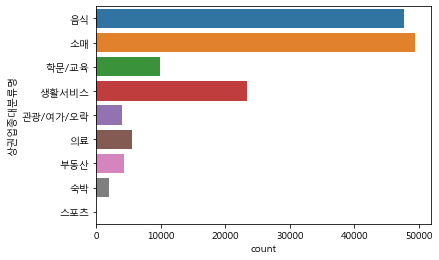

In [43]:
sns.countplot(data=df_seoul, y="상권업종대분류명")

# ----------------

# 베스킨라빈스와 던킨도너츠 

## 배스킨라빈스와 던킨도너츠 데이타프레임 생성

```
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape
```

In [60]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(169, 39)

In [61]:
df_31.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## 컬럼명 정리

df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.columns

In [62]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [63]:
df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
1868,비알코리아던킨도너츠김해공항국제선1호,NaN,음식,패스트푸드,부산광역시 강서구 대저2동 2350,부산광역시 강서구 공항진입로 108,35.172733,128.945756,강서구,대저2동
1871,비알코리아던킨도너츠김해공항공항국제선2호,NaN,음식,패스트푸드,부산광역시 강서구 대저2동 2350,부산광역시 강서구 공항진입로 108,35.172733,128.945756,강서구,대저2동
2096,배스킨라빈스부산금정이마트점,부산금정이마트점,음식,패스트푸드,부산광역시 금정구 구서동 368,부산광역시 금정구 중앙대로1841번길 24,35.250034,129.090709,금정구,구서1동
12129,배스킨라빈스부산대역점,부산대역점,음식,패스트푸드,부산광역시 금정구 장전동 293-116,부산광역시 금정구 금정로60번길 37,35.229558,129.088337,금정구,장전3동
12760,던킨도너츠부산메리츠타워점,부산메리츠타워점,음식,패스트푸드,부산광역시 동구 초량동 1143-1,부산광역시 동구 중앙대로 331,35.125970,129.045408,동구,초량3동


df_31['상호명'].value_counts()

## 브랜드명 컬럼 추가하기 

In [64]:
df_31['브랜드명'] = ''

df_31[['상호명', '브랜드명']].head()

df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [65]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [66]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
1868,비알코리아던킨도너츠김해공항국제선1호,던킨도너츠
1871,비알코리아던킨도너츠김해공항공항국제선2호,던킨도너츠
2096,배스킨라빈스부산금정이마트점,배스킨라빈스
12129,배스킨라빈스부산대역점,배스킨라빈스
12760,던킨도너츠부산메리츠타워점,던킨도너츠


In [67]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    125
던킨도너츠      44
Name: 브랜드명, dtype: int64

In [68]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배 많다.'.format(df_31_ratio))

던킨도너츠보다 배스킨라빈스의 매장이 2.84배 많다.


In [69]:
df_31['브랜드명'] = ''

In [70]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [72]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
1868,비알코리아던킨도너츠김해공항국제선1호,던킨도너츠
1871,비알코리아던킨도너츠김해공항공항국제선2호,던킨도너츠
2096,배스킨라빈스부산금정이마트점,배스킨라빈스
12129,배스킨라빈스부산대역점,배스킨라빈스
12760,던킨도너츠부산메리츠타워점,던킨도너츠


In [73]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

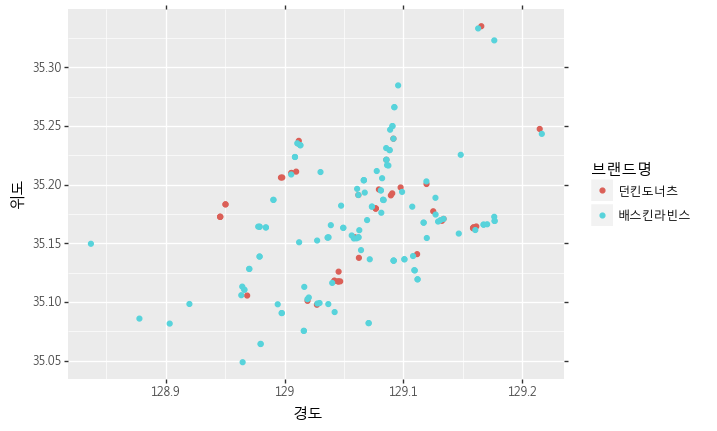

<ggplot: (-9223372036812837397)>

In [74]:
(ggplot(df_31)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='Malgun Gothic'))
)

In [75]:
geo_df = df_31.copy()

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [76]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
   
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    
    folium.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map